In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
train_data = pd.read_csv('/content/train_tweet.csv')

ParserError: Error tokenizing data. C error: EOF inside string starting at row 10811

In [ ]:
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
test_data = pd.read_csv('/content/test_tweet.csv')

In [ ]:
test_data.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
full_dataset = pd.concat([train_data, test_data], ignore_index=True)

In [ ]:
print(full_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      49159 non-null  int64  
 1   label   31962 non-null  float64
 2   tweet   49159 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB
None


In [ ]:
full_dataset.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [ ]:
full_dataset.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid Ã°ÂŸÂ˜Â˜ #hairflip #nev...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [ ]:
full_dataset.isnull().sum()


,0
id,0
label,17197
tweet,0


In [ ]:
full_dataset['label'] = full_dataset['label'].fillna(0)

In [ ]:
full_dataset.isnull().sum()

,0
id,0
label,0
tweet,0


In [ ]:
full_dataset.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [ ]:
tweet_df = full_dataset.drop(['id', 'label'], axis=1)
tweet_df.head()

,tweet
0,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation


In [ ]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run 

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked 

  bihday your majesty 

#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   

 factsguide: society now    #motivation 



In [ ]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   49159 non-null  object
dtypes: object(1)
memory usage: 384.2+ KB


# **data processing**

In [ ]:
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+https\S+", '',tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','',tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_text = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
tweet_df.tweet = tweet_df['tweet'].apply(data_processing)

In [ ]:
tweet_df = tweet_df.drop_duplicates('tweet')

# **stemming**

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [ ]:
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: stemming(x))

<ipython-input-35-37c8418c881b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: stemming(x))


In [ ]:
tweet_df.head()

,tweet
0,user father dysfunctional selfish drags kids d...
1,user user thanks lyft credit cant use cause do...
2,bihday majesty
3,model love u take u time urð ðððð ððð
4,factsguide society motivation


In [ ]:
# Apply the polarity function to the 'tweet' column
tweet_df['polarity'] = tweet_df['tweet'].apply(polarity)
tweet_df.head(10)

,tweet,polarity
0,user father dysfunctional selfish drags kids d...,-0.5
1,user user thanks lyft credit cant use cause do...,0.2
2,bihday majesty,0.0
3,model love u take u time urð ðððð ððð,0.5
4,factsguide society motivation,0.0
5,22 huge fan fare big talking leave chaos pay d...,0.2
6,user camping tomorrow user user user user user...,0.0
7,next school year year examsð cant think ð scho...,-0.4
8,love land allin cavs champions cleveland cleve...,0.5
9,user user welcome im gr8,0.8


In [ ]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [ ]:
tweet_df['sentiment'] = tweet_df['polarity'].apply(sentiment)

In [ ]:
tweet_df.head()

,tweet,polarity,sentiment
0,user father dysfunctional selfish drags kids d...,-0.5,Negative
1,user user thanks lyft credit cant use cause do...,0.2,Positive
2,bihday majesty,0.0,Neutral
3,model love u take u time urð ðððð ððð,0.5,Positive
4,factsguide society motivation,0.0,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

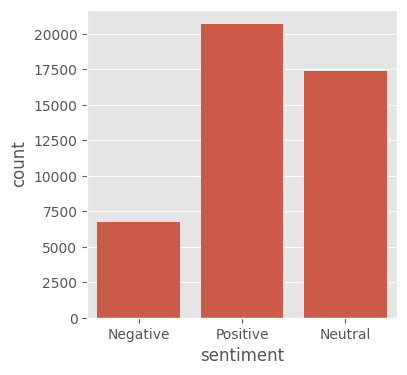

In [ ]:
fig = plt.figure(figsize=(4,4))
sns.countplot(x='sentiment', data = tweet_df)

Text(0.5, 1.0, 'Distribution of sentiments')

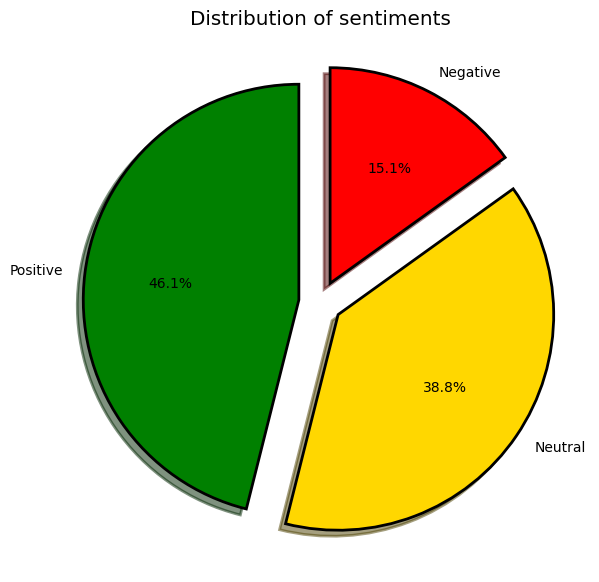

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("green", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = tweet_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [ ]:
pos_tweets = tweet_df[tweet_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,tweet,polarity,sentiment
45818,perfect date,1.0,Positive
22223,excellent team user exhibitionsday well,1.0,Positive
45410,expes explain best way deal friends family,1.0,Positive
8222,lawyer humor humor quotes mothers mtv scene qu...,1.0,Positive
8231,dinner ðð½ð delicious omeletcontainingfriedric...,1.0,Positive


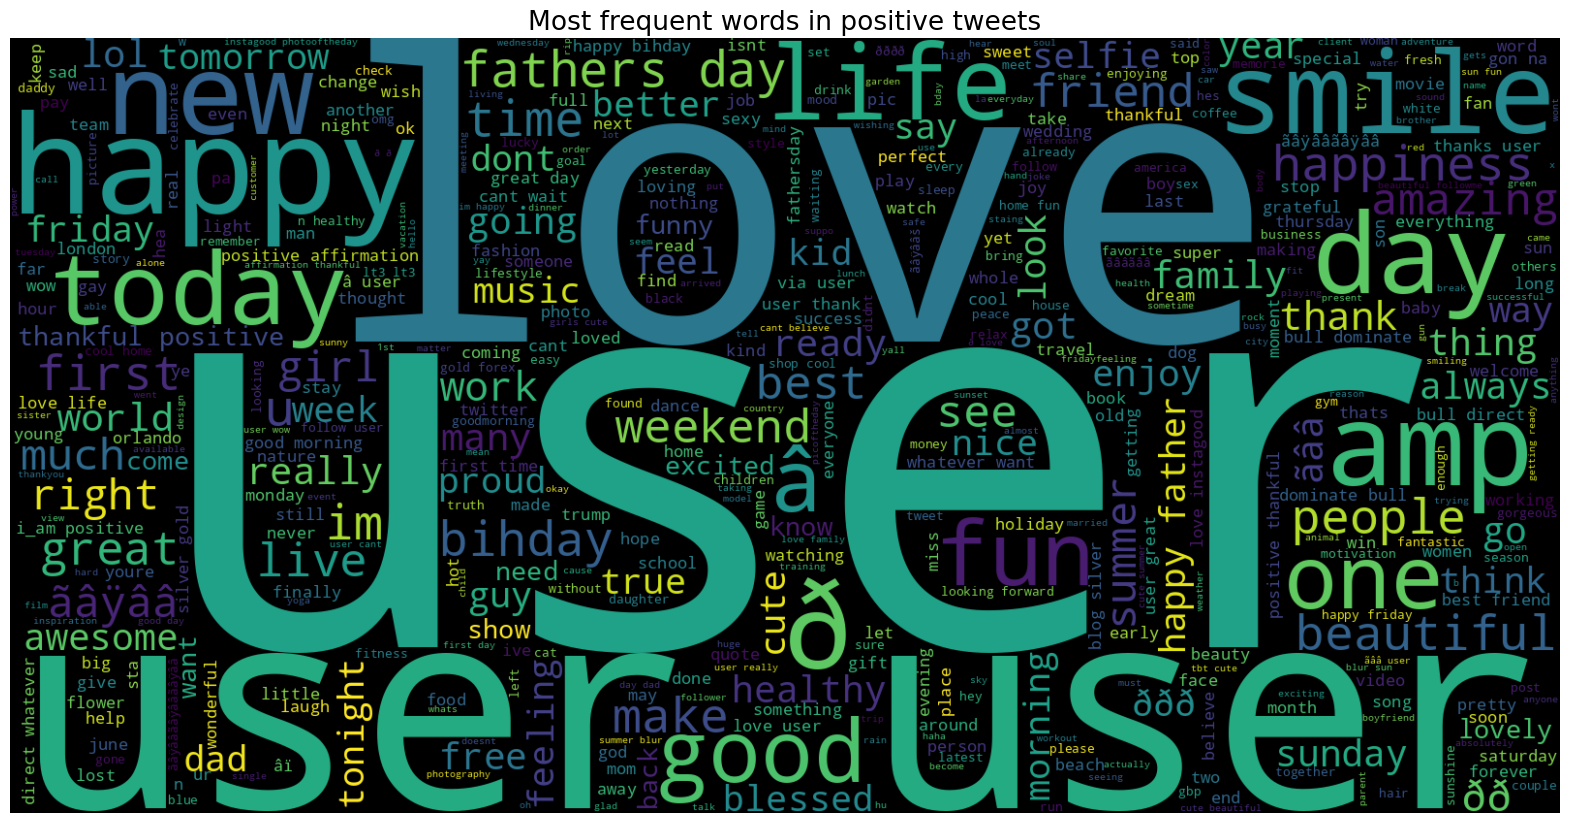

In [ ]:
tweet = ' '.join([word for word in pos_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(tweet)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [ ]:
neg_tweets = tweet_df[tweet_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,tweet,polarity,sentiment
3299,user tried vanilla sweet cream cold brew wasnt...,-6.938894e-18,Negative
2195,poor innocent child dead top killed shit ton g...,-9.251859e-18,Negative
45967,user nyer dog fight love game front center com...,-9.251859e-18,Negative
8736,play dead roll good boy ðdead frog bored work ...,-1.850372e-17,Negative
2104,people fail recognize good things happen lives...,-1.850372e-17,Negative


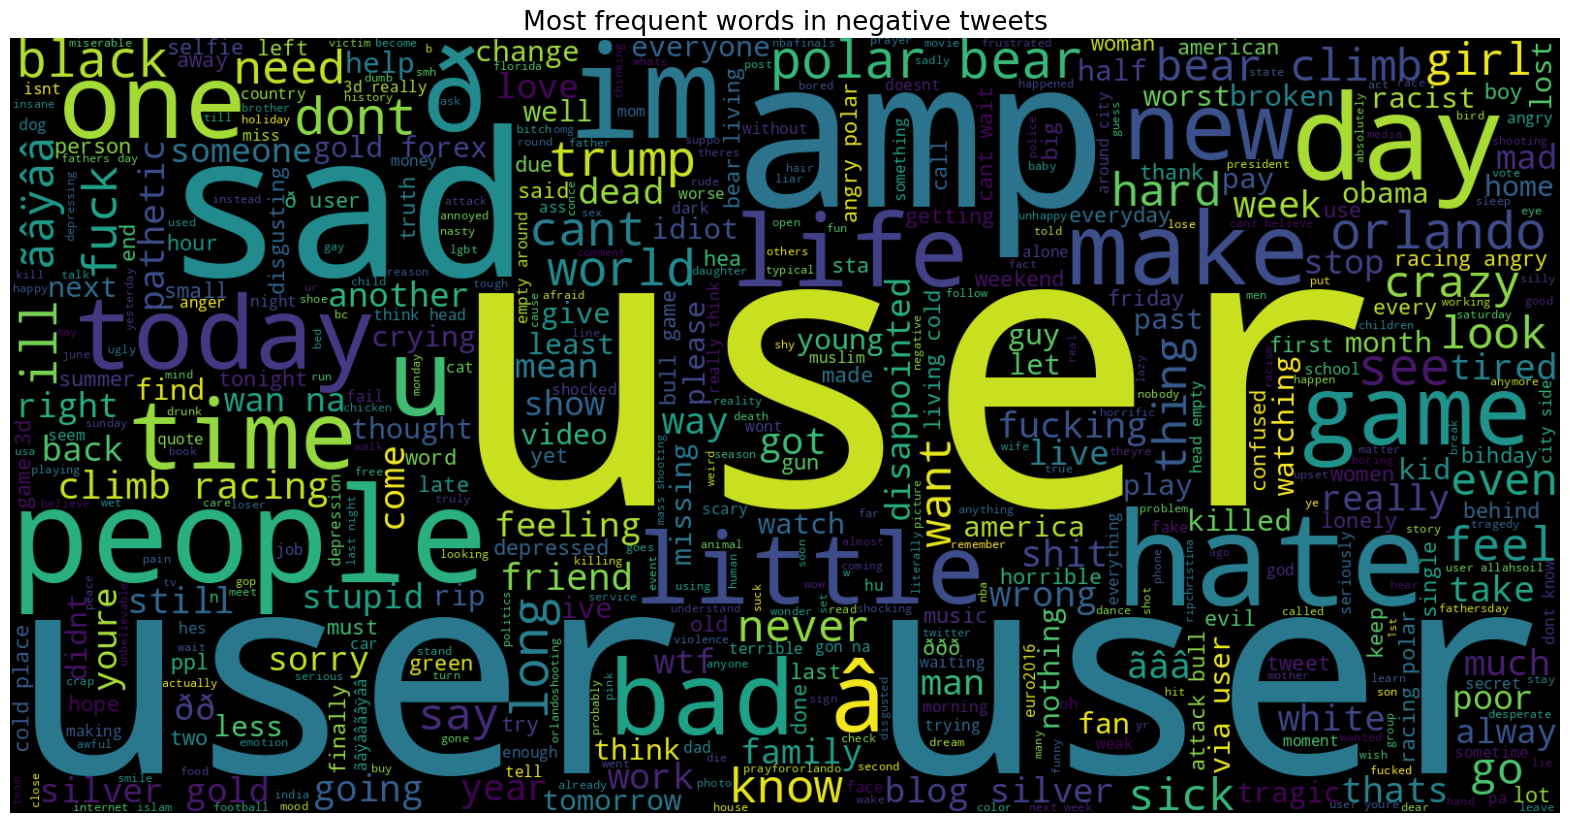

In [ ]:
tweet = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(tweet)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [ ]:
neutral_tweets = tweet_df[tweet_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,tweet,polarity,sentiment
2,bihday majesty,0.0,Neutral
32489,sat watch user,0.0,Neutral
32505,bob marley sang songs humanity youths ths days...,0.0,Neutral
32504,cant find fob poster decorating room poster fa...,0.0,Neutral
32500,close booked wedding dates wait share pictures...,0.0,Neutral


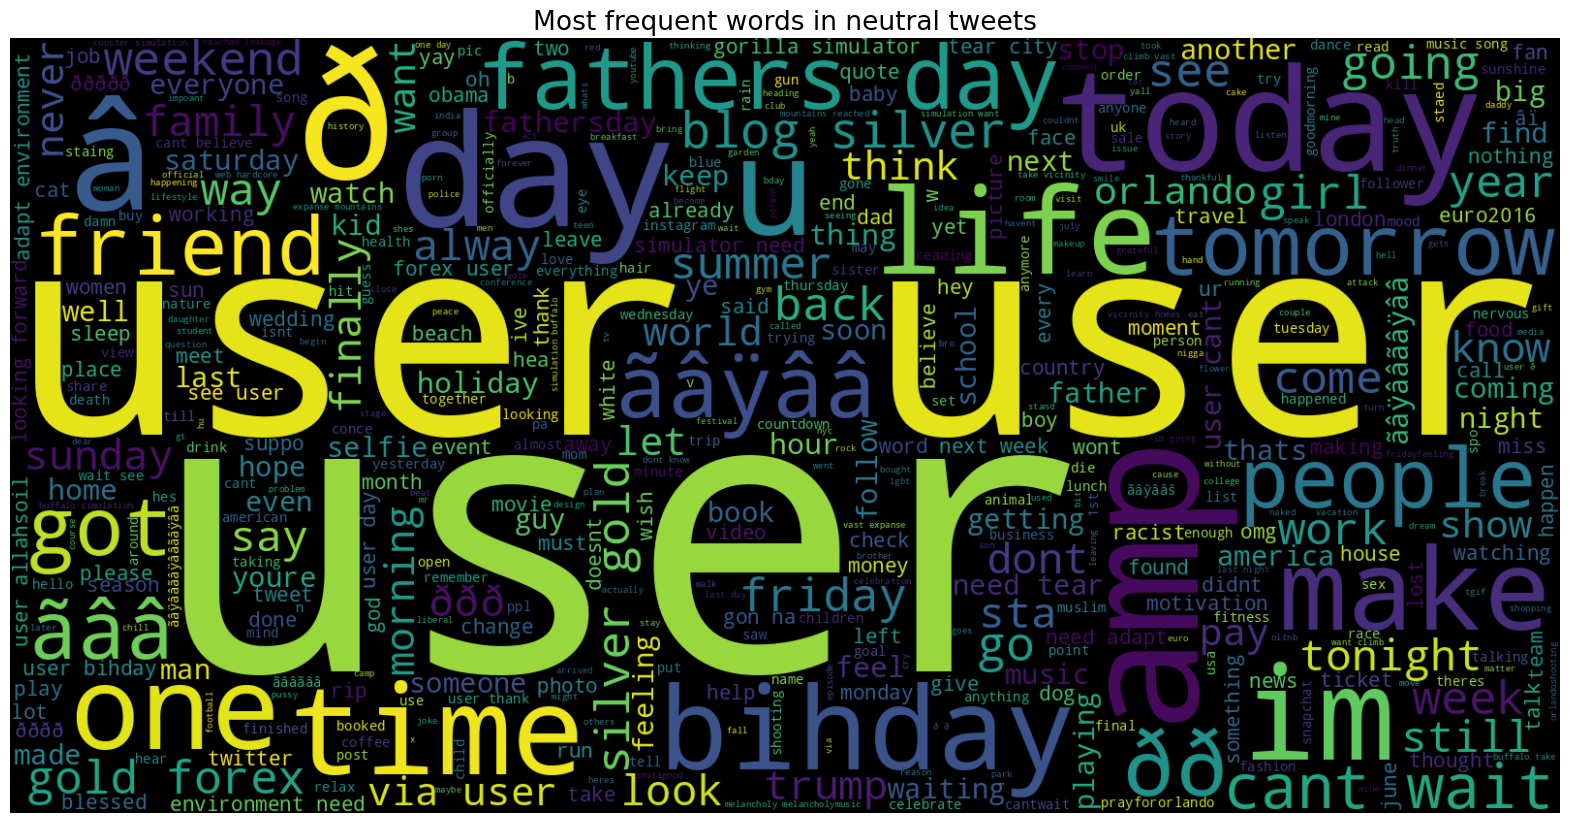

In [ ]:
tweet = ' '.join([word for word in neutral_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(tweet)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(tweet_df['tweet'])

In [ ]:
X = tweet_df['tweet']
Y = tweet_df['sentiment']
X = vect.transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (35882, 304152)
Size of y_train: (35882,)
Size of x_test: (8971, 304152)
Size of y_test: (8971,)


In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 92.83%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))


[[1015  235  113]
 [  15 3474   22]
 [  53  205 3839]]


              precision    recall  f1-score   support

    Negative       0.94      0.74      0.83      1363
     Neutral       0.89      0.99      0.94      3511
    Positive       0.97      0.94      0.95      4097

    accuracy                           0.93      8971
   macro avg       0.93      0.89      0.91      8971
weighted avg       0.93      0.93      0.93      8971



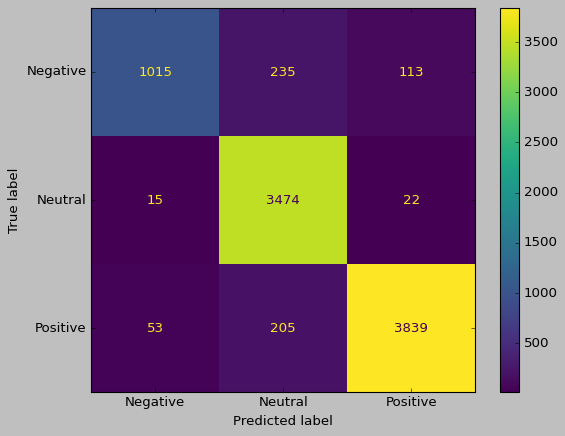

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

In [ ]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

NameError: name 'SVCmodel' is not defined

In [ ]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

In [ ]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

In [ ]:
print("Best parameter:", grid.best_params_)

In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[1060  194  109]
 [  15 3473   23]
 [  52  167 3878]]


              precision    recall  f1-score   support

    Negative       0.94      0.78      0.85      1363
     Neutral       0.91      0.99      0.95      3511
    Positive       0.97      0.95      0.96      4097

    accuracy                           0.94      8971
   macro avg       0.94      0.90      0.92      8971
weighted avg       0.94      0.94      0.94      8971



In [2]:
import tweepy #to access the twitter api
import pandas as pd #for basic data operations

In [3]:
# Importing the keys from twitter api
consumerKey = "4AASjwebgE5Fv5F0RkXZH2ZTI"
consumerSecret = "6OmDlYuzgw4xQC4unyXs4kgJ4Sit6BQgVeGxdof97QYDzwrU1b"
accessToken = "1672263600499732480-1ZzyQzFaAUZhVkDwpfd5l1asmbL4Ip"
accessTokenSecret = "gDJEx2GWKBgRwEQ1UcRME0vhoiEOeOiMIb7act1KIExkY"


In [4]:
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)
# Test the connection
try:
    api.verify_credentials()
    print("Authentication successful!")
except Exception as e:
    print(f"Error during authentication: {e}")

Authentication successful!


In [ ]:
# Search for the Term and define number of tweets
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

Enter Keyword/Tag to search about: #trump
Enter how many tweets to search: 10


In [ ]:
import tweepy

# Replace with your API credentials
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAEcCxwEAAAAAGHKkK9brDBOw0fssRKLEdMCOL1o%3DFqvB22pk4kkvhDioNjQrao1Sb7wCZlA29l7Liz9gNHbZqU5TqO"

# Authenticate using the Bearer Token
client = tweepy.Client(bearer_token=BEARER_TOKEN)

# Search tweets
query = "Python"
response = client.search_recent_tweets(query=query, max_results=10, tweet_fields=['created_at', 'text', 'author_id'])

# Process and print tweets
for tweet in response.data:
    print(f"Tweet ID: {tweet.id}")
    print(f"Created At: {tweet.created_at}")
    print(f"Author ID: {tweet.author_id}")
    print(f"Tweet Text: {tweet.text}")
    print("-" * 50)
